In [1]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#必要なライブラリのインストールやインポート
!pip install japanize-matplotlib
import pandas as pd
%matplotlib inline
import japanize_matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 4.1 MB 11.5 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=131d0086dc6f16b1db4465f829f26789371f2d797ceae70d034aed8c0785c83d
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [3]:
#★★実装機能要件
#★★１．CSVファイルの読み込みと表示。

#csvの読み込みと、中身の確認（全部で442行のデータ）
df = pd.read_csv('drive/MyDrive/csv/diabetes.csv',encoding="cp932")
df

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [4]:
# データの種類の確認（質的データの確認）
# 今回は標準化されてしまっているので、存在しない


In [5]:
#★★実装機能要件
#★★２．カテゴリ特徴量列があるときはダミー変数化

# 今回は標準化されてしまっているので、不要

In [6]:
#★★実装機能要件3
#テストデータのサイズは２０％に設定
train_val,test = train_test_split(df, test_size = 0.2, random_state = 0)

In [7]:
#★★実装機能要件
#★★４－１．欠損値処理の過程が実装されている

#欠損値の確認
print("欠損値の個数：",train_val.isnull().sum().sum())

#欠損値なし

欠損値の個数： 0


In [8]:
!pip install japanize-matplotlib

In [9]:
# 各種ライブラリの準備
import pandas as pd
%matplotlib inline
import japanize_matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

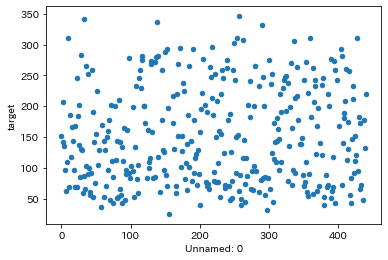

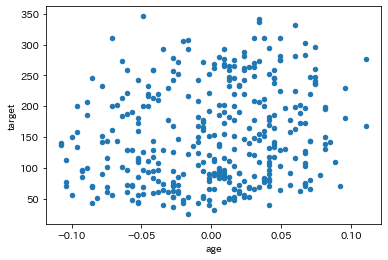

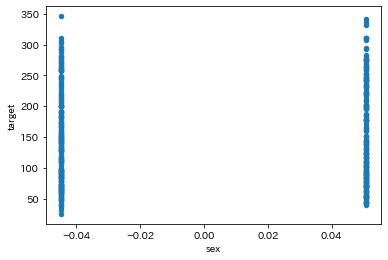

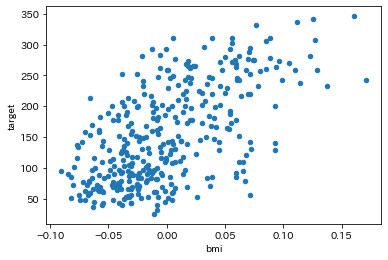

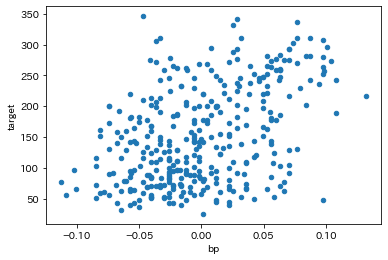

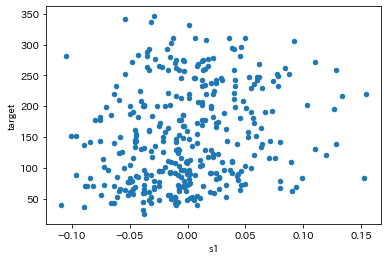

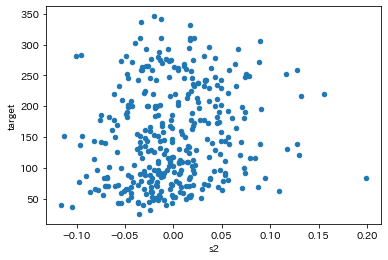

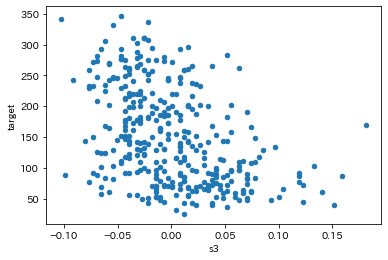

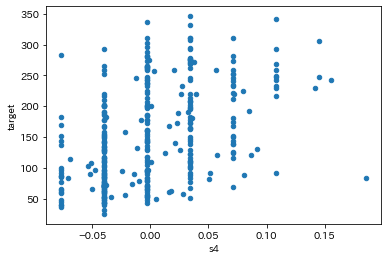

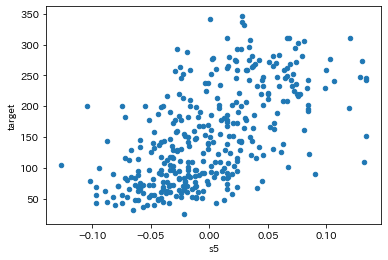

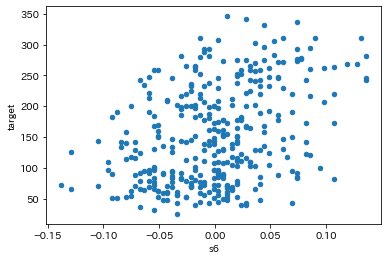

In [10]:
#散布図の描画　※正解データ同士の散布図は出さない
colname = train_val.columns
for name in colname:
  if name == 'target': 
    continue
  train_val.plot(kind = 'scatter', x = name, y = 'target')

In [11]:
#★★実装機能要件４－２－２
#★★特徴量の絞り込みが理解できるように実装されている（特徴量の絞り込みの根拠を示すこと）

#準備として、相関係数を求める

soukan = train_val.corr()['target']
soukan_keisu = soukan.map(abs)
soukan_keisu.sort_values(ascending = False)


target        1.000000
bmi           0.612887
s5            0.587840
s4            0.447861
bp            0.442845
s3            0.429634
s6            0.381622
s1            0.210114
age           0.187709
s2            0.160665
Unnamed: 0    0.075237
sex           0.040009
Name: target, dtype: float64

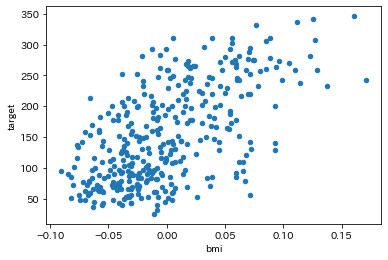

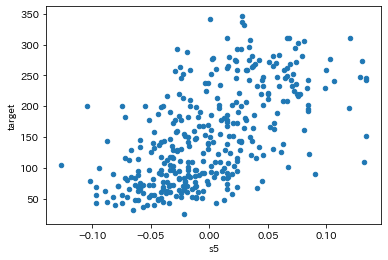

In [12]:
#★★実装機能要件5
#特徴量が２以上の回帰のため「線形重回帰」を利用する
from sklearn.preprocessing import StandardScaler

#★★実装機能要件４－２－２
#★★特徴量の絞り込みが理解できるように実装されている（特徴量の絞り込みの根拠を示すこと）

#相関係数0.5以上の物に絞り込む
train_val2 = train_val.drop(['age'], axis = 1)
train_val2 = train_val2.drop(['Unnamed: 0'], axis = 1)
train_val2 = train_val2.drop(['sex'], axis = 1)
train_val2 = train_val2.drop(['bp'], axis = 1)
train_val2 = train_val2.drop(['s1'], axis = 1)
train_val2 = train_val2.drop(['s2'], axis = 1)
train_val2 = train_val2.drop(['s3'], axis = 1)
train_val2 = train_val2.drop(['s4'], axis = 1)
train_val2 = train_val2.drop(['s6'], axis = 1)

#散布図の描画　※正解データ同士の散布図は出さない
colname = train_val2.columns
for name in colname:
  if name == 'target': 
    continue
  train_val2.plot(kind = 'scatter', x = name, y = 'target')

In [13]:
soukan = train_val2.corr()['target']
soukan_keisu = soukan.map(abs)
soukan_keisu.sort_values(ascending = False)

target    1.000000
bmi       0.612887
s5        0.587840
Name: target, dtype: float64

In [14]:
#★★実装機能要件
#★★４－２－１．外れ値の処理が過程が理解できるように実装されている（外れ値があるかないかを判断する情報を提供すること）

#マハラノビス距離を利用するとスコアが下がったので、いったん外れ値の処理は行わない（別で報告したものです）


In [15]:
#★★実装機能要件4-2-3．標準化が実装されている

#事前にされている

#from sklearn.preprocessing import StandardScaler
#sc_model_x = StandardScaler()
#sc_model_x.fit(x_train)
#sc_x = sc_model_x.transform(x_train)

#sc_model_y = StandardScaler()
#sc_model_y.fit(y_train)
#sc_y = sc_model_y.transform(y_train)


In [16]:
#★★実装機能要件4-2-4．多項式特徴量、交互作用特徴量が必要に応じて追加実装されている
#元の値が分からないため実施しない

In [17]:
#訓練データとテストデータに分割する
x = train_val2.iloc[:,:-1] #正解データは最後の１列のtarget
t = train_val2[['target']]
x_train,x_val,y_train,y_val = train_test_split(x,t,test_size = 0.2, random_state=0)

In [18]:
#★★実装機能要件6、7
#学習を行い、結果を表示する
#線形重回帰モデルを使用して学習させる
model = LinearRegression()
model.fit(x_train,y_train)

#訓練段階の決定係数を表示
print('訓練データ：',model.score(x_train,y_train))

#検証データで決定係数を求めて表示
print('検証データ：',model.score(x_val,y_val))

#0.549120683091601   ←　特徴量 ['age',	'sex',	'bmi',	'bp',	's1',	's2',	's3',	's4',	's5',	's6']
#0.5750532436933471  ←　特徴量 ['bmi','s4',	's5']
#0.5756946496108029  ←　特徴量 ['bmi','s5']

訓練データ： 0.4662489388743254
検証データ： 0.5756946496108029


In [49]:
#スコアが低いので回帰木で再度検証
from sklearn.tree import DecisionTreeRegressor

model_d5 = DecisionTreeRegressor(random_state = 0,max_depth = 5)
model_d5.fit(x_train,y_train) # 学習

print('訓練データ：',model_d5.score(x_train, y_train)) # 訓練データの正解率
print('検証データ：',model_d5.score(x_val, y_val)) # テストデータの正解率

訓練データ： 0.6490956473396283
検証データ： 0.34951942962260474


In [30]:
#より深くするが、スコアは下がり
model_d6 = DecisionTreeRegressor(random_state = 0,max_depth = 6)
model_d6.fit(x_train,y_train) # 学習

print('訓練データ：',model_d6.score(x_train, y_train)) # 訓練データの正解率
print('検証データ：',model_d6.score(x_val, y_val)) # テストデータの正解率

0.744436030108811
0.20411728590372535


In [31]:
#いよいよ負となったため、深くしてもダメだと分かる
model_d8 = DecisionTreeRegressor(random_state = 0,max_depth = 8)
model_d8.fit(x_train,y_train) # 学習

print('訓練データ：',model_d8.score(x_train, y_train)) # 訓練データの正解率
print('検証データ：',model_d8.score(x_val, y_val)) # テストデータの正解率

0.8912364816925824
-0.03965668351915386


In [32]:
#深さを５よりも浅くしていく
model_d4 = DecisionTreeRegressor(random_state = 0,max_depth = 4)
model_d4.fit(x_train,y_train) # 学習

print('訓練データ：',model_d4.score(x_train, y_train)) # 訓練データの正解率
print('検証データ：',model_d4.score(x_val, y_val)) # テストデータの正解率

0.5736220976909361
0.4278730971815593


In [33]:
#浅くしていく
model_d3 = DecisionTreeRegressor(random_state = 0,max_depth = 3)
model_d3.fit(x_train,y_train) # 学習

print('訓練データ：',model_d3.score(x_train, y_train)) # 訓練データの正解率
print('検証データ：',model_d3.score(x_val, y_val)) # テストデータの正解率

0.5133025647899245
0.5403372076529471


In [34]:
#浅くしていく
model_d2 = DecisionTreeRegressor(random_state = 0,max_depth = 2)
model_d2.fit(x_train,y_train) # 学習

print('訓練データ：',model_d2.score(x_train, y_train)) # 訓練データの正解率
print('検証データ：',model_d2.score(x_val, y_val)) # テストデータの正解率

0.45882263630396103
0.48945961151912853


In [35]:
#浅くしていく、が、スコアは上がらなかった
model_d1 = DecisionTreeRegressor(random_state = 0,max_depth = 1)
model_d1.fit(x_train,y_train) # 学習

print('訓練データ：',model_d1.score(x_train, y_train)) # 訓練データの正解率
print('検証データ：',model_d1.score(x_val, y_val)) # テストデータの正解率

0.31412300397527215
0.24343734206675205


In [50]:
#ランダムフォレストの回帰で再度挑戦する
from sklearn.ensemble import RandomForestRegressor

rfrModel = RandomForestRegressor(random_state = 0,n_estimators = 100)
rfrModel.fit(x_train, y_train)
print('訓練データ：',rfrModel.score(x_train, y_train) )# 決定係数
print('検証データ：',rfrModel.score(x_val, y_val))     # 決定係数

#訓練データのスコアのみ伸び、検証データではスコアが伸びない

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


訓練データ： 0.9097309326104004
検証データ： 0.3685992785872234


In [52]:
# スコアが伸びないため、アダブースト回帰で挑戦する
from sklearn.ensemble import AdaBoostRegressor

 # ベースモデルとしての回帰木
from sklearn.tree import DecisionTreeRegressor

base = DecisionTreeRegressor(random_state = 0, max_depth = 3)

# 100個のモデルで逐次学習
abrModel = AdaBoostRegressor(random_state = 0, n_estimators = 100,base_estimator = base)
abrModel.fit(x_train, y_train)
print('訓練データ：',abrModel.score(x_train, y_train))# 決定係数
print('検証データ：',abrModel.score(x_val, y_val))# 決定係数

#スコアが伸びない

訓練データ： 0.5304704445327002
検証データ： 0.4853916849377522


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#★★実装機能要件
#★★８．学習後のモデルを保存

import pickle

with open('tounyou.pkl','wb') as f:
    pickle.dump(model,f)